# Time series forecasting - LSTM

In [1]:
import numpy as np
import pandas as pd

import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, LSTM, Flatten, Bidirectional, GRU, SimpleRNN

In [2]:
def prepare_data(timeseries_data, n_features):
    x, y=[],[]
    for i in range(len(timeseries_data)):
        end_ix = i + n_features

        if end_ix > len(timeseries_data)-1:
            break

        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        x.append(seq_x)
        y.append(seq_y)

    return np.array(x), np.array(y)


In [3]:
timeseries_data = [100,120,135,145,150,160,185,200,225,300]
n_steps = 3

x,y = prepare_data(timeseries_data, n_steps)

In [4]:
print(x)
print(y)

[[100 120 135]
 [120 135 145]
 [135 145 150]
 [145 150 160]
 [150 160 185]
 [160 185 200]
 [185 200 225]]
[145 150 160 185 200 225 300]


In [5]:
print(x.shape)
print(y.shape)


(7, 3)
(7,)


### Reshape from [sample, timesteps] into [sample, timesteps, features]

In [6]:
n_features = 1
x = x.reshape(x.shape[0], x.shape[1], n_features) #(sample_data, timestep, no. of features)

In [7]:
x

array([[[100],
        [120],
        [135]],

       [[120],
        [135],
        [145]],

       [[135],
        [145],
        [150]],

       [[145],
        [150],
        [160]],

       [[150],
        [160],
        [185]],

       [[160],
        [185],
        [200]],

       [[185],
        [200],
        [225]]])

In [9]:
x.shape

(7, 3, 1)

### Building model

In [10]:
model = Sequential()
#No need for embedding layer as input data is already in numbers and not characters
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))    #Give 3 inputs and expect 1 output
model.add(LSTM(50, activation='relu'))  #Adding activation layer as it is numerical data
model.add(Dense(1)) #Linear
model.compile(optimizer='adam', loss='mse') #This is linear regression
model.fit(x,y, epochs=200, verbose=1)

Epoch 1/200
1/1 [==============================] - 1s 747ms/step - loss: 38680.4688
Epoch 2/200
1/1 [==============================] - 0s 3ms/step - loss: 38431.5000
Epoch 3/200
1/1 [==============================] - 0s 2ms/step - loss: 38138.5312
Epoch 4/200
1/1 [==============================] - 0s 2ms/step - loss: 37794.4648
Epoch 5/200
1/1 [==============================] - 0s 4ms/step - loss: 37378.5391
Epoch 6/200
1/1 [==============================] - 0s 2ms/step - loss: 36881.8555
Epoch 7/200
1/1 [==============================] - 0s 2ms/step - loss: 36303.3477
Epoch 8/200
1/1 [==============================] - 0s 2ms/step - loss: 35705.2500
Epoch 9/200
1/1 [==============================] - 0s 2ms/step - loss: 35193.4336
Epoch 10/200
1/1 [==============================] - 0s 2ms/step - loss: 34813.8945
Epoch 11/200
1/1 [==============================] - 0s 2ms/step - loss: 34473.3008
Epoch 12/200
1/1 [==============================] - 0s 3ms/step - loss: 34103.0234
Epoch 13/20

In [20]:
# Predicting for the next 25 revenue data

x_input = np.array([200,225,300])
temp_input = list(x_input)
output =[]

i=0
while(i<10):
    if(len(temp_input)>3):
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print("{} day input {}".format(i, yhat))
        temp_input.append(yhat[0][0])
        temp_input = temp_input[1:]
        output.append(yhat[0][0])
        i += 1
    else:
        x_input = x_input.reshape(1, n_steps, n_features)
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        output.append(yhat[0][0])
        i += 1

print(output)


[332.47116]
1 day input [225.         300.         332.47116089]
1 day input [[370.15704]]
2 day input [300.         332.47116089 370.15704346]
2 day input [[521.5165]]
3 day input [332.47116 370.15704 521.5165 ]
3 day input [[574.3999]]
4 day input [370.15704 521.5165  574.3999 ]
4 day input [[613.78827]]
5 day input [521.5165  574.3999  613.78827]
5 day input [[913.8541]]
6 day input [574.3999  613.78827 913.8541 ]
6 day input [[993.17413]]
7 day input [613.78827 913.8541  993.17413]
7 day input [[1046.1943]]
8 day input [ 913.8541   993.17413 1046.1943 ]
8 day input [[1601.7247]]
9 day input [ 993.17413 1046.1943  1601.7247 ]
9 day input [[1729.1158]]
[332.47116, 370.15704, 521.5165, 574.3999, 613.78827, 913.8541, 993.17413, 1046.1943, 1601.7247, 1729.1158]


In [21]:
timeseries_data

[100, 120, 135, 145, 150, 160, 185, 200, 225, 300]

In [22]:
output

[332.47116,
 370.15704,
 521.5165,
 574.3999,
 613.78827,
 913.8541,
 993.17413,
 1046.1943,
 1601.7247,
 1729.1158]

In [13]:
import matplotlib.pyplot as plt

day_new = np.arange(0, 10)
day_pred = np.arange(10, 20)

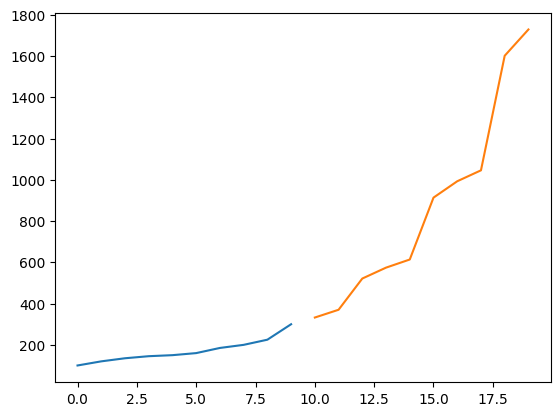

In [24]:
plt.plot(day_new, timeseries_data)
plt.plot(day_pred, output)
plt.show()